In [14]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as pl
import tensorflow as tf

In [15]:
## Libraries

import tensorflow as tf
import ssl
import urllib.request

model = tf.keras.models.Sequential()
Dense = tf.keras.layers.Dense
Dropout = tf.keras.layers.Dropout
LSTM = tf.keras.layers.LSTM

## Dataset
mnist_data = tf.keras.datasets.mnist # mnist is a dataset of 28x28 images of handwritten digits and their labels with 60,000 rows of data

## Create train and test data
# (x_train, y_train),(x_test, y_test) = mnist_data.load_data()
# load mnistdata to train valadaion and test
(x_train, y_train),(x_test, y_test) = mnist_data.load_data()

x_train = x_train/255.0 # Normalize training data features
x_test = x_test/255.0 # Normalize training data labels



In [16]:
# split the train data to validate and train
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# VGG 16

In [17]:
from keras.applications import VGG16
from keras import models
from keras import layers
from keras import optimizers


# matching the data size to the model requirements

(48000, 28, 28)


(48000, 32, 32)

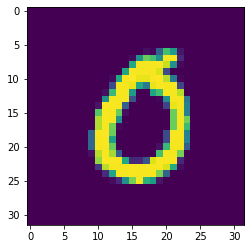

In [18]:
x_train[1]
print(x_train.shape)
#plot image
pl.imshow(x_train[1])
# add padding all images in x_tran and X_test
newX_train = np.zeros((x_train.shape[0], 32, 32))
newX_test = np.zeros((x_test.shape[0], 32, 32))
newX_val = np.zeros((x_val.shape[0], 32, 32))

for i in range(x_train.shape[0]):
    newX_train[i, 2:30, 2:30] = x_train[i,:,:]
for i in range(x_test.shape[0]):
    newX_test[i, 2:30, 2:30] = x_test[i,:,:]
for i in range(x_val.shape[0]):
    newX_val[i, 2:30, 2:30] = x_val[i,:,:]


# newX_train = np.zeros((60000, 32, 32))
# newX_test = np.zeros((10000, 32, 32))
# for i in range(60000):
#     newX_train[i, 2:30, 2:30] = x_train[i, :, :]
# for i in range(10000):
#     newX_test[i, 2:30, 2:30] = x_test[i, :, :]
# newX_train[1].shape
# plot image
pl.imshow(newX_train[5000])
# plot shape
newX_train.shape



In [19]:
vgg = VGG16(weights=None, include_top=False, input_shape=(32, 32, 1))
model = models.Sequential()
model.add(vgg)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14713536  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,847,434
Trainable params: 14,847,434
Non-trainable params: 0
_________________________________________________________________


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [21]:
print(newX_train.shape)
print(newX_test.shape)
print(newX_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(48000, 32, 32)
(10000, 32, 32)
(12000, 32, 32)
(48000,)
(10000,)
(12000,)


In [22]:

model.fit(newX_train, y_train, epochs=4, batch_size=64, validation_data=(newX_val, y_val))

Epoch 1/4
750/750 [==============================] - 436s 582ms/step - loss: 0.1885 - acc: 0.9408 - val_loss: 0.1146 - val_acc: 0.9628
Epoch 2/4
750/750 [==============================] - 1397s 2s/step - loss: 0.1035 - acc: 0.9679 - val_loss: 0.0923 - val_acc: 0.9696
Epoch 3/4
750/750 [==============================] - 439s 585ms/step - loss: 0.0735 - acc: 0.9767 - val_loss: 0.0541 - val_acc: 0.9833
Epoch 4/4
750/750 [==============================] - 440s 587ms/step - loss: 0.0560 - acc: 0.9820 - val_loss: 0.0494 - val_acc: 0.9845


In [23]:
model.evaluate(newX_test, y_test)

313/313 [==============================] - 21s 67ms/step - loss: 0.0425 - acc: 0.9858


[0.04253426939249039, 0.98580002784729]